<a href="https://colab.research.google.com/github/ayyucedemirbas/Bioinformatics/blob/main/Statistics_for_Genomic_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

if (!require("Biobase", quietly = TRUE))
    BiocManager::install("Biobase")

library(Biobase)

con <- url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/montpick_eset.RData")

load(file = con)
close(con)

mp <- montpick.eset

pdata <- pData(mp)

edata <- as.data.frame(exprs(mp))

fdata <- fData(mp)


print("Phenotype Data (first 6 rows):")
head(pdata)

print("Expression Data Dimensions:")
dim(edata)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Installing package(s) 'BiocVersion', 'Biobase'

also installing the dependency ‘BiocGenerics’


Old packages: 'base64enc', 'broom', 'bslib', 'cluster', 'cpp11', 'data.table',
  'dplyr', 'dtplyr', 'foreign', 'gargle', 'ggplot2', 'lattice', 'lubridate',
  'pkgload', 'rappdirs', 'timechange', 'uuid', 'vctrs', 'viridisLite', 'vroom',
  'xfun', 'xml2'

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: ‘generics’


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: ‘BiocGenerics’


The foll

[1] "Phenotype Data (first 6 rows):"


,sample.id,num.tech.reps,population,study
,<fct>,<dbl>,<fct>,<fct>
NA06985,NA06985,1,CEU,Montgomery
NA06986,NA06986,1,CEU,Montgomery
NA06994,NA06994,1,CEU,Montgomery
NA07000,NA07000,1,CEU,Montgomery
NA07037,NA07037,1,CEU,Montgomery
NA07051,NA07051,1,CEU,Montgomery


[1] "Expression Data Dimensions:"


[1] 52580   129

In [ ]:
get_pc1_percent <- function(matrix_data) {
  s <- svd(matrix_data)
  d <- s$d

  pc1_var <- d[1]^2 / sum(d^2)

  return(pc1_var)
}

pct1 <- get_pc1_percent(as.matrix(edata))

edata_log <- log2(edata + 1)
pct2 <- get_pc1_percent(as.matrix(edata_log))

edata_centered <- edata_log - rowMeans(edata_log)
pct3 <- get_pc1_percent(as.matrix(edata_centered))

cat(sprintf("1. No transformations: %.1f%%\n", pct1 * 100))
cat(sprintf("2. log2(data + 1):     %.1f%%\n", pct2 * 100))
cat(sprintf("3. log2 + centered:    %.1f%%\n", pct3 * 100))

1. No transformations: 88.7%
2. log2(data + 1):     97.4%
3. log2 + centered:    34.6%


In [ ]:
edata_log <- log2(edata + 1)

edata_centered <- edata_log - rowMeans(edata_log)

set.seed(333)

km <- kmeans(t(edata_centered), centers = 2)

s <- svd(edata_centered)

correlation <- cor(s$v[,1], km$cluster)

print("Correlation between 1st singular vector and clustering indicator:")
print(correlation)

[1] "Correlation between 1st singular vector and clustering indicator:"
[1] -0.8678247



Call:
lm(formula = gene1_counts ~ factor(num_reps))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1304 -0.1304 -0.1304 -0.0833  4.8696 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)        0.08333    0.06720   1.240    0.217
factor(num_reps)2  0.04710    0.09188   0.513    0.609

Residual standard error: 0.5205 on 127 degrees of freedom
Multiple R-squared:  0.002065,	Adjusted R-squared:  -0.005793 
F-statistic: 0.2628 on 1 and 127 DF,  p-value: 0.6091


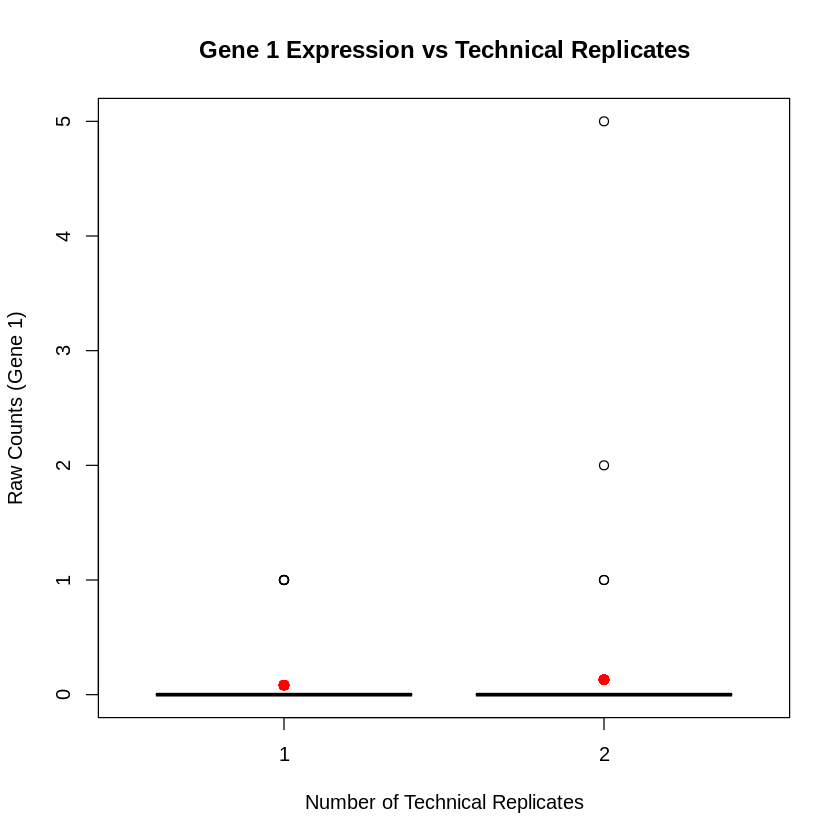

In [ ]:
gene1_counts <- as.numeric(edata[1, ])

num_reps <- pdata$num.tech.reps

lm_fit <- lm(gene1_counts ~ factor(num_reps))

summary(lm_fit)

plot(factor(num_reps), gene1_counts,
     main = "Gene 1 Expression vs Technical Replicates",
     xlab = "Number of Technical Replicates",
     ylab = "Raw Counts (Gene 1)",
     col = "lightblue")

points(factor(num_reps), fitted(lm_fit), col="red", pch=19)

In [ ]:
con = url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bodymap_eset.RData")
load(file=con)
close(con)

bm = bodymap.eset
pdata = pData(bm)
edata = exprs(bm)

lm_fit = lm(edata[1,] ~ pdata$age + pdata$gender)
summary(lm_fit)

age_coeff = coef(lm_fit)["pdata$age"]
print(paste("Coefficient for Age:", age_coeff))


Call:
lm(formula = edata[1, ] ~ pdata$age + pdata$gender)

Residuals:
    Min      1Q  Median      3Q     Max 
-734.35 -229.31   -3.26  243.02  768.09 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2331.581    438.181   5.321 0.000139 ***
pdata$age      -23.913      6.488  -3.686 0.002744 ** 
pdata$genderM -207.257    236.431  -0.877 0.396610    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 469.6 on 13 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.5147,	Adjusted R-squared:   0.44 
F-statistic: 6.894 on 2 and 13 DF,  p-value: 0.009102


[1] "Coefficient for Age: -23.9133027960683"


In [ ]:
library(Biobase)
con <- url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/montpick_eset.RData")
load(file=con)
close(con)

mp <- montpick.eset
pdata <- pData(mp)
edata <- exprs(mp)

edata_log <- log2(edata + 1)

mod <- model.matrix(~ pdata$population)

y_matrix <- t(edata_log)

fit <- lm.fit(mod, y_matrix)

dim_residuals <- dim(fit$residuals)
dim_effects <- dim(fit$effects)
dim_coefficients <- dim(fit$coefficients)

print("Dimensions of Residuals Matrix:")
print(dim_residuals)

print("Dimensions of Effects Matrix:")
print(dim_effects)

print("Dimensions of Coefficients Matrix:")
print(dim_coefficients)

[1] "Dimensions of Residuals Matrix:"
[1]   129 52580
[1] "Dimensions of Effects Matrix:"
[1]   129 52580
[1] "Dimensions of Coefficients Matrix:"
[1]     2 52580


In [ ]:
if (!require("limma", quietly = TRUE))
    BiocManager::install("limma")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Installing package(s) 'limma'

also installing the dependency ‘statmod’


Old packages: 'base64enc', 'broom', 'bslib', 'cluster', 'cpp11', 'data.table',
  'dplyr', 'dtplyr', 'foreign', 'gargle', 'ggplot2', 'lattice', 'lubridate',
  'pkgload', 'rappdirs', 'timechange', 'uuid', 'vctrs', 'viridisLite', 'vroom',
  'xfun', 'xml2'




Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




[1] "Coefficients for Gene 1000:"
    (Intercept) pdata_clean$age 
     2469.87375       -27.61178 


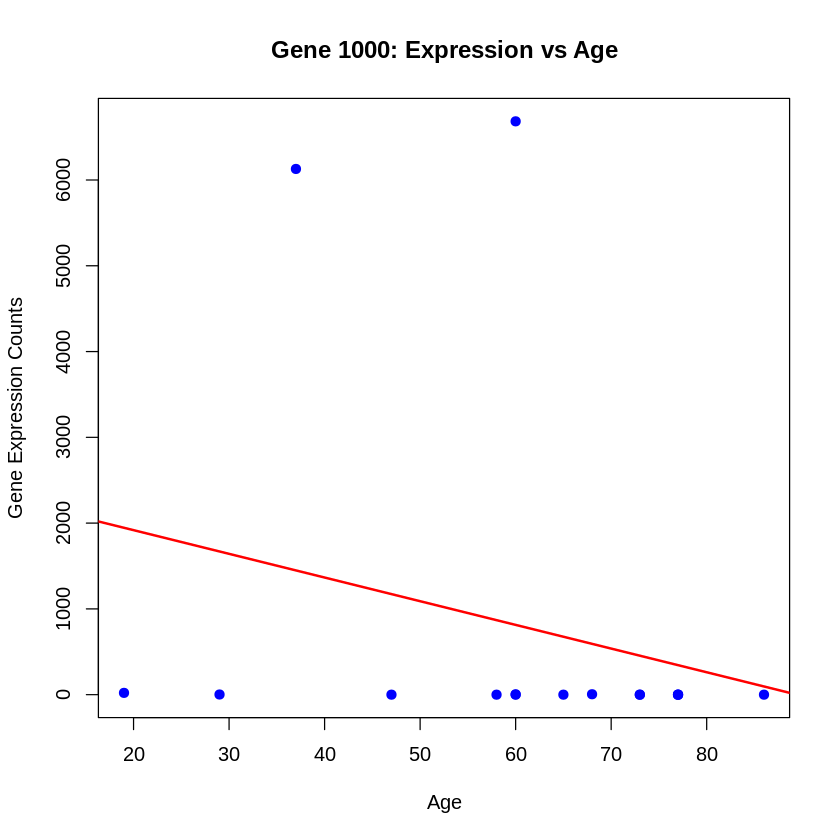

In [ ]:
library(Biobase)
library(limma)

con = url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bodymap_eset.RData")
load(file=con)
close(con)

bm = bodymap.eset
pdata = pData(bm)
edata = exprs(bm)

keep_samples <- !is.na(pdata$age)

pdata_clean <- pdata[keep_samples, ]
edata_clean <- edata[, keep_samples]

design <- model.matrix(~ pdata_clean$age)
fit <- lmFit(edata_clean, design)

gene_idx <- 1000
coeffs <- fit$coefficients[gene_idx, ]

print("Coefficients for Gene 1000:")
print(coeffs)
plot(pdata_clean$age, edata_clean[gene_idx, ],
     main = "Gene 1000: Expression vs Age",
     xlab = "Age",
     ylab = "Gene Expression Counts",
     pch = 19, col = "blue")

abline(a = coeffs[1], b = coeffs[2], col = "red", lwd = 2)

In [ ]:
library(Biobase)
library(limma)

con = url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bodymap_eset.RData")
load(file=con)
close(con)

bm = bodymap.eset
pdata = pData(bm)

keep_samples <- !is.na(pdata$age)
pdata_clean <- pdata[keep_samples, ]

num_samples <- nrow(pdata_clean)


num_tissues <- length(unique(pdata_clean$tissue.type))

num_coeffs <- 1 + (num_tissues - 1) + 1 # (Intercept + Age + Tissues-1)

print(paste("Number of Samples (Data Points):", num_samples))
print(paste("Number of Tissue Levels:", num_tissues))

if(num_coeffs > num_samples) {
    print("PROBLEM: More coefficients to estimate than data points!")
}

[1] "Number of Samples (Data Points): 16"
[1] "Number of Tissue Levels: 16"
[1] "PROBLEM: More coefficients to estimate than data points!"


In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

if (!require("sva", quietly = TRUE))
    BiocManager::install("sva")

library(Biobase)
library(sva)

con = url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bodymap_eset.RData")
load(file=con)
close(con)

bm = bodymap.eset
pdata = pData(bm)
edata = exprs(bm)

keep_samples = !is.na(pdata$age)
pdata_clean = pdata[keep_samples, ]
edata_clean = edata[, keep_samples]


edata_log = log2(edata_clean + 1)

gene_means = rowMeans(edata_log)
edata_filt = edata_log[gene_means >= 1, ]

set.seed(33353)

mod1 = model.matrix(~ age, data = pdata_clean)
mod0 = model.matrix(~ 1, data = pdata_clean)


sv_obj = sva(edata_filt, mod1, mod0, n.sv=1)

sv1 = sv_obj$sv[, 1]


cor_age = cor(sv1, pdata_clean$age)


cor_race = cor(sv1, as.numeric(as.factor(pdata_clean$race)))

cor_gender = cor(sv1, as.numeric(as.factor(pdata_clean$gender)))

print(paste("Correlation with Age:", round(cor_age, 2)))
print(paste("Correlation with Race:", round(cor_race, 2)))
print(paste("Correlation with Gender:", round(cor_gender, 2)))

if(abs(cor_gender) > abs(cor_race)) {
  print("Result: More highly correlated with GENDER")
} else {
  print("Result: More highly correlated with RACE")
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Installing package(s) 'sva'

also installing the dependencies ‘XVector’, ‘Seqinfo’, ‘png’, ‘Biostrings’, ‘formatR’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘KEGGREST’, ‘XML’, ‘lambda.r’, ‘futile.options’, ‘MatrixGenerics’, ‘AnnotationDbi’, ‘annotate’, ‘futile.logger’, ‘snow’, ‘BH’, ‘locfit’, ‘genefilter’, ‘BiocParallel’, ‘matrixStats’, ‘edgeR’


Old packages: 'base64enc', 'broom', 'bslib', 'cluster', 'cpp11', 'data.table',
  'dplyr', 'dtplyr', 'foreign', 'gargle', 'ggplot2', 'lattice', 'lubridate',
  'pkgload', 'rappdirs', 'timechange', 'uuid', 'vctrs', 'viridisLite', 'vroom',
  'xfun', 'xml2'

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.9-4. For overview type '?mgcv'.

Loading required package: g

Number of significant surrogate variables is:  1 
Iteration (out of 5 ):1  2  3  4  5  [1] "Correlation with Age: -0.2"
[1] "Correlation with Race: -0.23"
[1] "Correlation with Gender: -0.35"
[1] "Result: More highly correlated with GENDER"


In [12]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("snpStats")
install.packages("broom")


library(snpStats)
library(broom)

data(for.exercise)

use <- seq(1, ncol(snps.10), 10)
sub.10 <- snps.10[, use]

snpdata <- sub.10@.Data

status <- subject.support$cc

print(dim(snpdata))
head(status)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Installing package(s) 'snpStats'

Old packages: 'base64enc', 'broom', 'bslib', 'cluster', 'cpp11', 'data.table',
  'dplyr', 'dtplyr', 'foreign', 'gargle', 'ggplot2', 'lattice', 'lubridate',
  'pkgload', 'rappdirs', 'timechange', 'uuid', 'vctrs', 'viridisLite', 'vroom',
  'xfun', 'xml2'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: survival

Loading required package: Matrix



[1] 1000 2851


[1] 0 0 0 0 0 0

In [13]:
snp3 <- as(sub.10[, 3], "numeric")
snp3[snp3 == 0] <- NA
df <- data.frame(status = status, snp3 = snp3)

In [14]:
model_linear <- lm(status ~ snp3, data = df)
summary_linear <- tidy(model_linear)

model_logit <- glm(status ~ snp3, data = df, family = "binomial")
summary_logit <- tidy(model_logit)

print("Linear Model Coefficients:")
print(summary_linear)

print("Logistic Regression Coefficients:")
print(summary_logit)

[1] "Linear Model Coefficients:"
# A tibble: 2 × 5
  term        estimate std.error statistic p.value
  <chr>          <dbl>     <dbl>     <dbl>   <dbl>
1 (Intercept)    0.706     0.268     2.63  0.00962
2 snp3          -0.228     0.255    -0.893 0.374  
[1] "Logistic Regression Coefficients:"
# A tibble: 2 × 5
  term        estimate std.error statistic p.value
  <chr>          <dbl>     <dbl>     <dbl>   <dbl>
1 (Intercept)    0.922      1.21     0.759   0.448
2 snp3          -1.01       1.17    -0.863   0.388


In [16]:
valid_rows <- !is.na(snp10)

snp10_clean <- snp10[valid_rows]
status_clean <- status[valid_rows]

fit_add <- glm(status_clean ~ snp10_clean, family = "binomial")

table(round(fitted(fit_add), 2), status_clean)

     status_clean
        0   1
  0.5 497 495

In [20]:
library(snpStats)
library(broom)
data(for.exercise)

use <- seq(1, ncol(snps.10), 10)
sub.10 <- snps.10[, use]
status <- subject.support$cc

numeric_snps <- as(sub.10, "numeric")
manual_squared_coefs <- apply(numeric_snps, 2, function(snp) {
  tryCatch({
    model <- glm(status ~ snp, family = "binomial")
    return(coef(model)[2]^2)
  }, error = function(e) return(NA))
})

rhs_results <- snp.rhs.tests(status ~ 1, snp.data = sub.10, family = "binomial")
chi_sq_values <- chi.squared(rhs_results)

correlation_result <- cor(manual_squared_coefs, chi_sq_values, use = "complete.obs")

cat("The correlation is:", correlation_result, "\n")

The correlation is: 0.02833631 


In [21]:
numeric_snps <- as(sub.10, "numeric")
manual_squared_coefs <- apply(numeric_snps, 2, function(snp) {
  valid <- !is.na(snp)
  if(sum(valid) < 10) return(NA)

  tryCatch({
    model <- glm(status[valid] ~ snp[valid], family = "binomial")
    return(coef(model)[2]^2)
  }, error = function(e) return(NA))
})

rhs_results <- snp.rhs.tests(status ~ 1, snp.data = sub.10, family = "binomial")
chi_sq_values <- chi.squared(rhs_results)
cor(manual_squared_coefs, chi_sq_values, use = "complete.obs")

[1] 0.02833631

In [22]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("genefilter")

library(genefilter)

con = url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/montpick_eset.RData")
load(file=con)
close(con)

mp = montpick.eset
pdata = pData(mp)
edata = as.data.frame(exprs(mp))

edata_log = log2(edata + 1)

f_stats = rowFtests(as.matrix(edata_log), as.factor(pdata$population))
t_stats = rowttests(as.matrix(edata_log), as.factor(pdata$population))

p_val_diff = all.equal(f_stats$p.value, t_stats$p.value)

f_vs_t2_diff = all.equal(f_stats$statistic, (t_stats$statistic)^2)

cat("Are p-values the same?", p_val_diff, "\n")
cat("Are statistics the same?", all.equal(f_stats$statistic, t_stats$statistic), "\n")
cat("Does F equal t^2?", f_vs_t2_diff, "\n")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'genefilter'”
Old packages: 'base64enc', 'broom', 'bslib', 'cluster', 'cpp11', 'data.table',
  'dplyr', 'dtplyr', 'foreign', 'gargle', 'ggplot2', 'lattice', 'lubridate',
  'pkgload', 'rappdirs', 'timechange', 'uuid', 'vctrs', 'viridisLite', 'vroom',
  'xfun', 'xml2'



Are p-values the same? TRUE 
Are statistics the same? Mean relative difference: 1.129305 
Does F equal t^2? TRUE 


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'limma' 'edgeR'”
Installing package(s) 'DESeq2'

also installing the dependencies ‘abind’, ‘SparseArray’, ‘S4Arrays’, ‘DelayedArray’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘RcppArmadillo’


Old packages: 'base64enc', 'broom', 'bslib', 'cluster', 'cpp11', 'data.table',
  'dplyr', 'dtplyr', 'foreign', 'gargle', 'ggplot2', 'lattice', 'lubridate',
  'pkgload', 'rappdirs', 'timechange', 'uuid', 'vctrs', 'viridisLite', 'vroom',
  'xfun', 'xml2'

Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:Matrix’:


The correlation between DESeq2 and limma statistics is: 0.93 


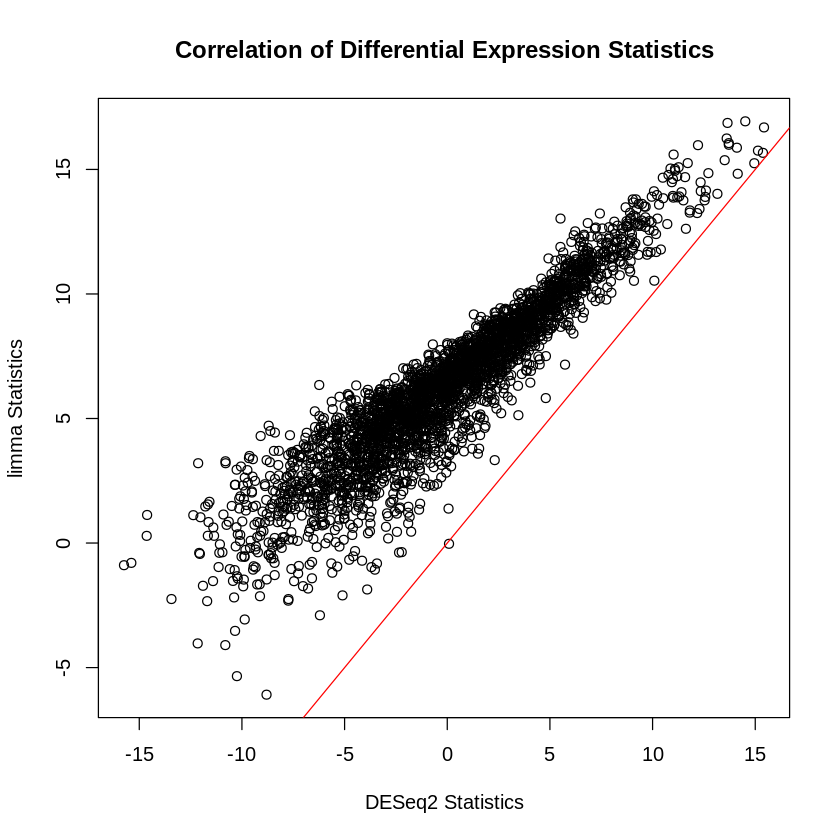

In [23]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(c("DESeq2", "limma", "edgeR"))

library(DESeq2)
library(limma)
library(edgeR)

con = url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/montpick_eset.RData")
load(file=con)
close(con)

mp = montpick.eset
pdata = pData(mp)
edata = as.data.frame(exprs(mp))

edata = edata[rowMeans(edata) > 100, ]

colData <- data.frame(study = pdata$population)
dds <- DESeqDataSetFromMatrix(countData = round(edata),
                              colData = colData,
                              design = ~ study)
dds <- DESeq(dds)
res_deseq <- results(dds)
deseq_stats <- res_deseq$stat

edata_log = log2(edata + 1)

design <- model.matrix(~ pdata$population)
fit <- lmFit(edata_log, design)
fit <- eBayes(fit)
limma_stats <- fit$t[, 2]

stat_correlation <- cor(deseq_stats, limma_stats, use = "complete.obs")


cat("The correlation between DESeq2 and limma statistics is:", round(stat_correlation, 2), "\n")

plot(deseq_stats, limma_stats,
     xlab = "DESeq2 Statistics", ylab = "limma Statistics",
     main = "Correlation of Differential Expression Statistics")
abline(0, 1, col="red")

In [24]:
p_deseq <- res_deseq$pvalue

p_limma <- fit$p.value[, 2]

adj_p_deseq <- p.adjust(p_deseq, method = "BH")
adj_p_limma <- p.adjust(p_limma, method = "BH")

sig_deseq <- sum(adj_p_deseq < 0.05, na.rm = TRUE)
sig_limma <- sum(adj_p_limma < 0.05, na.rm = TRUE)

cat("DESeq =", sig_deseq, "significant;\n")
cat("limma =", sig_limma, "significant\n")

DESeq = 1995 significant;
limma = 2807 significant


In [25]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install(c("Biobase", "limma"), update = FALSE, ask = FALSE)

library(Biobase)
library(limma)

con = url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bottomly_eset.RData")
load(file=con)
close(con)

bot = bottomly.eset
pdata_bot = pData(bot)
fdata_bot = featureData(bot)
edata = exprs(bot)

keep_rows = rowMeans(edata) > 5
fdata_bot = fdata_bot[keep_rows, ]
edata = edata[keep_rows, ]

edata = log2(edata + 1)

print("Dimensions of filtered data:")
print(dim(edata))

print("First few rows of processed expression data:")
head(edata[, 1:5])

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'Biobase' 'limma'”


[1] "Dimensions of filtered data:"
[1] 9431   21
[1] "First few rows of processed expression data:"


,SRX033480,SRX033488,SRX033481,SRX033489,SRX033482
ENSMUSG00000000001,8.531381,9.541097,8.169925,9.588715,8.447083
ENSMUSG00000000056,4.459432,5.554589,4.392317,5.209453,3.700440
ENSMUSG00000000058,4.000000,5.459432,3.700440,5.129283,3.906891
ENSMUSG00000000078,9.016808,9.773139,8.413628,9.668885,8.566054
ENSMUSG00000000088,8.098032,9.611025,8.108524,9.543032,8.238405
ENSMUSG00000000093,3.584963,4.643856,3.807355,5.129283,4.807355


In [26]:
library(limma)
library(Biobase)

strain = pdata_bot$strain
design = model.matrix(~ strain)

fit = lmFit(edata, design)

fit = eBayes(fit)

results = topTable(fit, coef=2, adjust.method="BH", number=nrow(edata), sort.by="none")

de_genes_indices = which(results$adj.P.Val < 0.05)
total_de_genes = length(de_genes_indices)

first_de_gene_index = de_genes_indices[1]
first_gene_id = featureNames(bot)[first_de_gene_index]

cat("Total genes differentially expressed (FDR < 5%):", total_de_genes, "\n")
cat("Identifier of the first DE gene in the list:", first_gene_id, "\n")

Total genes differentially expressed (FDR < 5%): 223 
Identifier of the first DE gene in the list: ENSMUSG00000000197 


In [27]:
results = topTable(fit, coef=2, adjust.method="BH", number=nrow(edata), sort.by="none")
de_genes_indices = which(results$adj.P.Val < 0.05)

total_de_genes = length(de_genes_indices)

first_gene_id = rownames(edata)[de_genes_indices[1]]

cat("Total genes:", total_de_genes, "\n")
cat("First DE gene ID:", first_gene_id, "\n")

Total genes: 223 
First DE gene ID: ENSMUSG00000000402 


In [28]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install(c("goseq", "geneLenDataBase", "org.Mm.eg.db"), update = FALSE)

library(goseq)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Installing package(s) 'goseq', 'geneLenDataBase', 'org.Mm.eg.db'

also installing the dependencies ‘filelock’, ‘bitops’, ‘Rhtslib’, ‘cigarillo’, ‘RCurl’, ‘BiocFileCache’, ‘Rsamtools’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’, ‘rjson’, ‘UCSC.utils’, ‘GenomeInfoDb’, ‘biomaRt’, ‘BiasedUrn’, ‘GO.db’, ‘rtracklayer’, ‘GenomicFeatures’, ‘txdbmaker’


Loading required package: BiasedUrn

Loading required package: geneLenDataBase


Attaching package: ‘geneLenDataBase’


The following object is masked from ‘package:S4Vectors’:

    unfactor






Loading mm9 length data...

Fetching GO annotations...

Loading required package: AnnotationDbi



For 545 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns



The top over-represented GO category is: GO:0004888 
Term description: transmembrane signaling receptor activity 


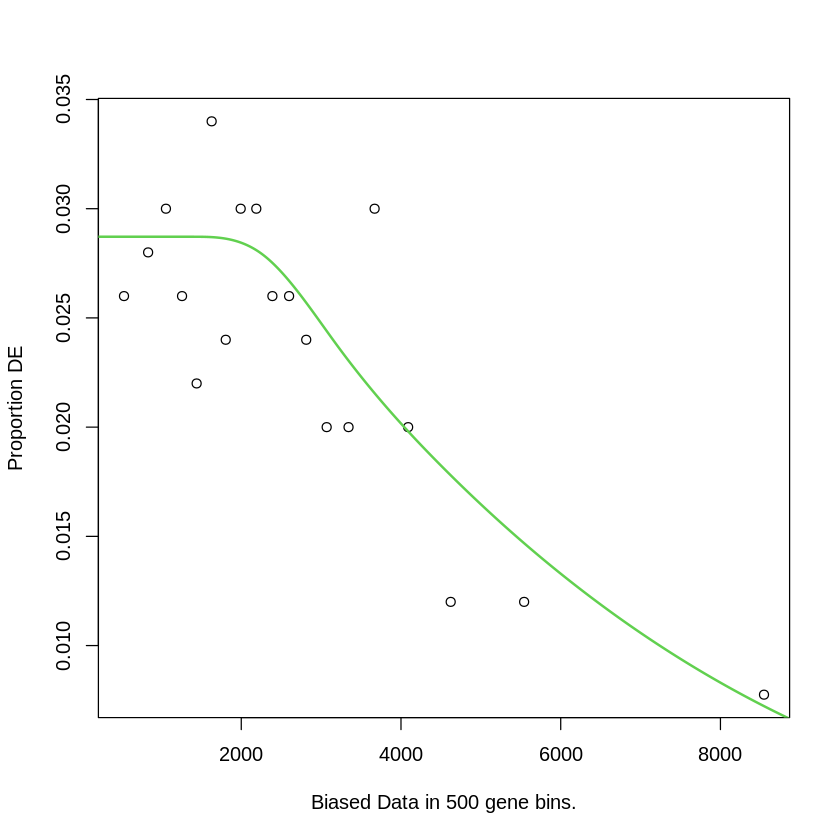

In [29]:
all_genes = rownames(edata)

genes_vector = as.integer(results$adj.P.Val < 0.05)
names(genes_vector) = all_genes

pwf = nullp(genes_vector, "mm9", "ensGene")

go_results = goseq(pwf, "mm9", "ensGene")

top_category = go_results$category[1]
top_overrepresented_term = go_results$term[1]

cat("The top over-represented GO category is:", top_category, "\n")
cat("Term description:", top_overrepresented_term, "\n")

In [30]:
library(Biobase)
library(limma)
library(goseq)

lane = as.factor(pdata_bot$lane)
strain = as.factor(pdata_bot$strain)

design_unadj = model.matrix(~ strain)
fit_unadj = eBayes(lmFit(edata, design_unadj))
res_unadj = topTable(fit_unadj, coef=2, adjust.method="BH", number=nrow(edata), sort.by="none")

genes_unadj = as.integer(res_unadj$adj.P.Val < 0.05)
names(genes_unadj) = rownames(edata)
pwf_unadj = nullp(genes_unadj, "mm9", "ensGene", plot.fit=FALSE)
go_unadj = goseq(pwf_unadj, "mm9", "ensGene")
top10_unadj = go_unadj$category[1:10]

design_adj = model.matrix(~ strain + lane)
fit_adj = eBayes(lmFit(edata, design_adj))
res_adj = topTable(fit_adj, coef=2, adjust.method="BH", number=nrow(edata), sort.by="none")

genes_adj = as.integer(res_adj$adj.P.Val < 0.05)
names(genes_adj) = rownames(edata)
pwf_adj = nullp(genes_adj, "mm9", "ensGene", plot.fit=FALSE)
go_adj = goseq(pwf_adj, "mm9", "ensGene")
top10_adj = go_adj$category[1:10]

common_categories = intersect(top10_unadj, top10_adj)
num_common = length(common_categories)

cat("Top 10 Unadjusted:", top10_unadj, "\n")
cat("Top 10 Adjusted:", top10_adj, "\n")
cat("Number of common categories in top 10:", num_common, "\n")

Loading mm9 length data...

Fetching GO annotations...

For 545 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns

Loading mm9 length data...

Fetching GO annotations...

For 545 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns



Top 10 Unadjusted: GO:0004888 GO:0038023 GO:0060089 GO:0007129 GO:0007127 GO:0061982 GO:0007276 GO:0070192 GO:0005576 GO:0007283 
Top 10 Adjusted: GO:0007127 GO:0007129 GO:0061982 GO:0005576 GO:0070192 GO:0045143 GO:0004875 GO:0005604 GO:0031012 GO:0030312 
Number of common categories in top 10: 5 


In [31]:
design_unadj = model.matrix(~ pdata_bot$strain)
fit_unadj = eBayes(lmFit(edata, design_unadj))
res_unadj = topTable(fit_unadj, coef=2, number=nrow(edata), sort.by="none")
genes_unadj = as.integer(res_unadj$adj.P.Val < 0.05)
names(genes_unadj) = rownames(edata)
pwf_unadj = nullp(genes_unadj, "mm9", "ensGene", plot.fit=FALSE)
go_unadj = goseq(pwf_unadj, "mm9", "ensGene")

lane = as.factor(pdata_bot$lane)
design_adj = model.matrix(~ pdata_bot$strain + lane)
fit_adj = eBayes(lmFit(edata, design_adj))
res_adj = topTable(fit_adj, coef=2, number=nrow(edata), sort.by="none")
genes_adj = as.integer(res_adj$adj.P.Val < 0.05)
names(genes_adj) = rownames(edata)
pwf_adj = nullp(genes_adj, "mm9", "ensGene", plot.fit=FALSE)
go_adj = goseq(pwf_adj, "mm9", "ensGene")

top10_unadj = go_unadj$category[1:10]
top10_adj = go_adj$category[1:10]

common = intersect(top10_unadj, top10_adj)
cat("Number of common categories:", length(common), "\n")

Loading mm9 length data...

Fetching GO annotations...

For 545 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns

Loading mm9 length data...

Fetching GO annotations...

For 545 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns



Number of common categories: 5 
